## Subnational Plotting

As we demonstrated in T1, T2, and T3, FPsim can also be used to test a variety of interventions. In this tutorial we show how it can also be used to focus on interventions at the subnational level. This tutorial walks you through how to define parameters, run simulations, and plot the results to model subnational scenarios.

##  Getting started

Installing and getting started with FPsim is quite simple.

To install, just type `pip install fpsim`. If it worked, you should be able to import FPsim with `import fpsim as fp`.

In [78]:
import fpsim as fp
import sciris as sc

### Defining parameters

We begin by looking at the national setting: Ethiopia. We define the most common category of parameters (i.e., the initial number of agents, the location (i.e. Senegal, Kenya, or Ethiopia), and the starting and ending years) as:

In [101]:
n_agents   = 100_000
start_year = 2000
end_year   = 2019
repeats    = 3
year       = 2010
youth_ages = ['<18', '18-20']

pars = fp.pars(location='ethiopia', n_agents=n_agents, start_year=start_year, end_year=end_year) 

do_plot = True

We then run the simulation at the national level for Ethiopia and produce a set of default plots. 

  Running 2000 of 2019 ( 0/229) (1.13 s)  ———————————————————— 0%
  Running 2001 of 2019 (12/229) (1.92 s)  •——————————————————— 6%
  Running 2002 of 2019 (24/229) (2.68 s)  ••—————————————————— 11%
  Running 2003 of 2019 (36/229) (3.49 s)  •••————————————————— 16%
  Running 2004 of 2019 (48/229) (4.20 s)  ••••———————————————— 21%
  Running 2005 of 2019 (60/229) (4.84 s)  •••••——————————————— 27%
  Running 2006 of 2019 (72/229) (5.56 s)  ••••••—————————————— 32%
  Running 2007 of 2019 (84/229) (6.27 s)  •••••••————————————— 37%
  Running 2008 of 2019 (96/229) (7.05 s)  ••••••••———————————— 42%
  Running 2009 of 2019 (108/229) (7.82 s)  •••••••••——————————— 48%
  Running 2010 of 2019 (120/229) (8.67 s)  ••••••••••—————————— 53%
  Running 2011 of 2019 (132/229) (12.22 s)  •••••••••••————————— 58%
  Running 2012 of 2019 (144/229) (13.27 s)  ••••••••••••———————— 63%
  Running 2013 of 2019 (156/229) (14.34 s)  •••••••••••••——————— 69%
  Running 2014 of 2019 (168/229) (15.14 s)  ••••••••••••

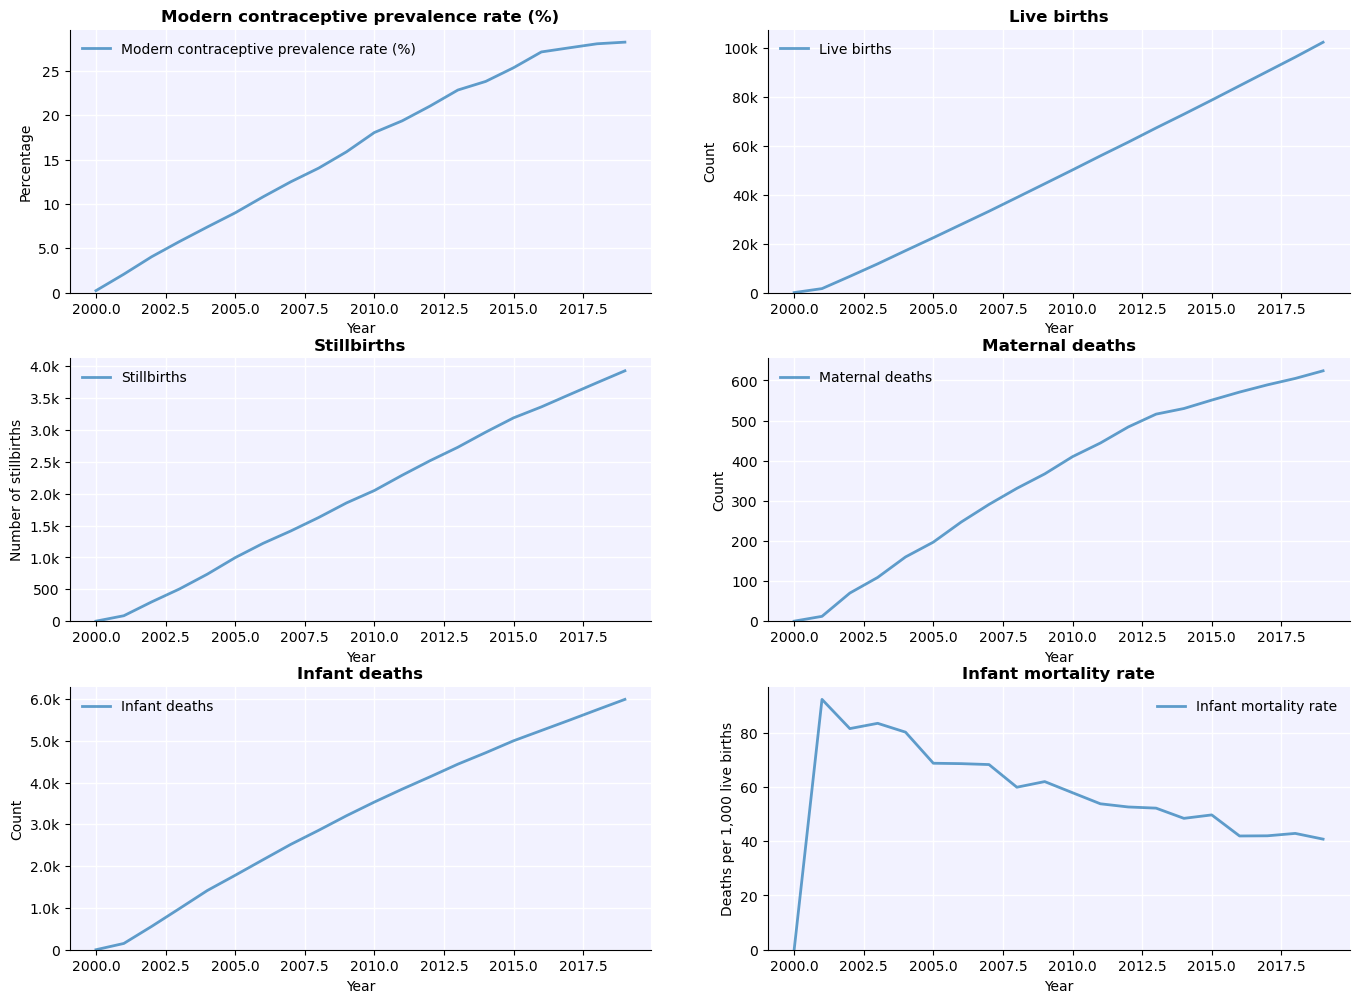

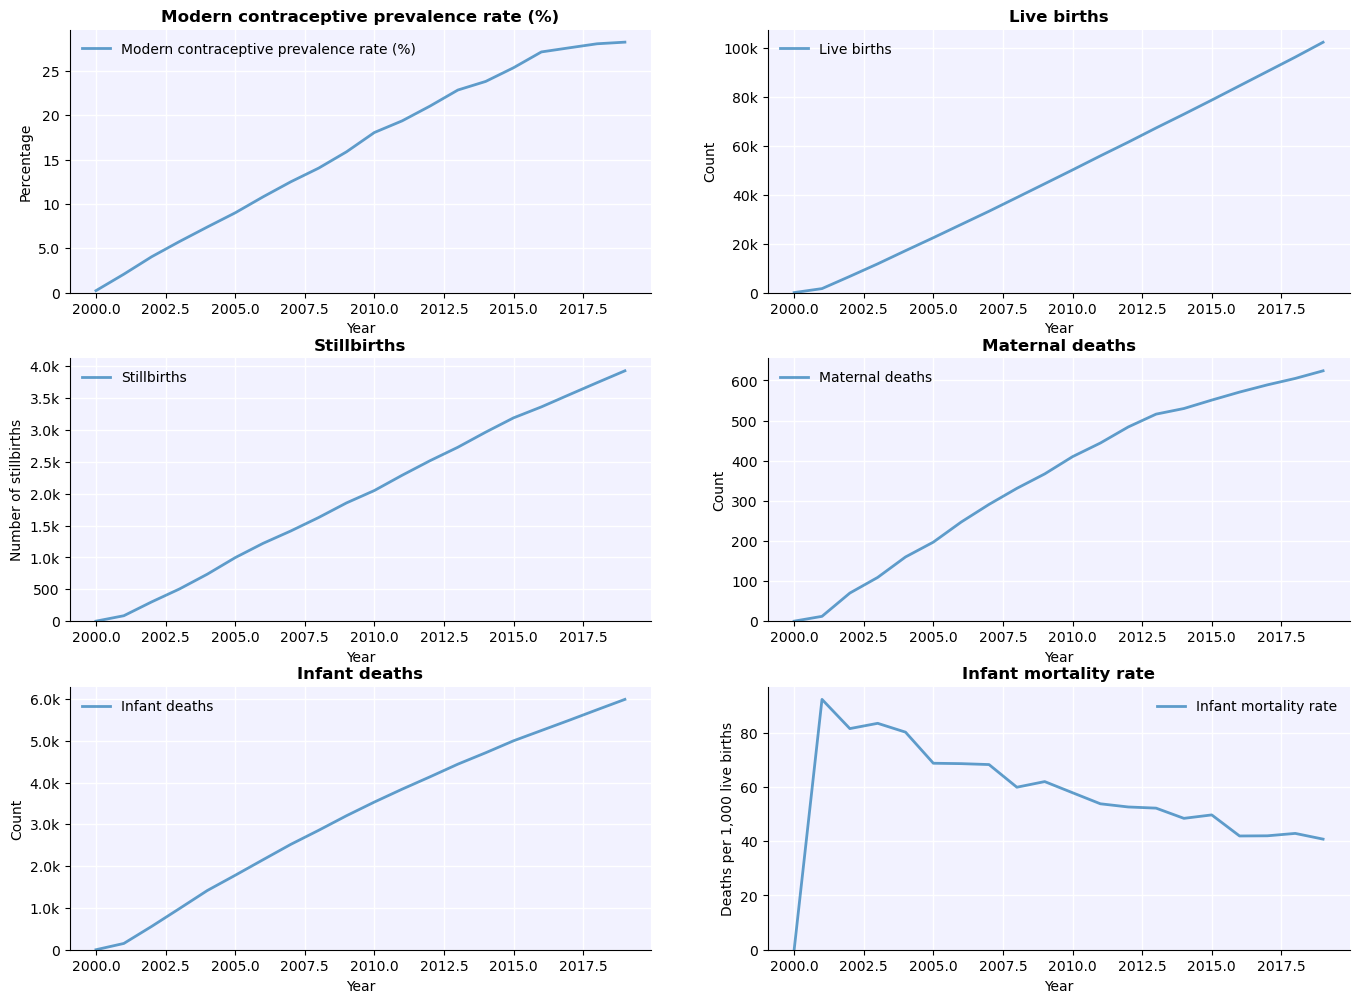

In [102]:
sim = fp.Sim(pars)
sim.run()
sim.plot() # the default


We can also run the simulation at the subnational level for multiple, producing the same set of default plots. 

In [ ]:
pars1 = fp.pars(location='amhara', n_agents=n_agents, start_year=start_year, end_year=2016) 
pars2 = fp.pars(location='oromia', n_agents=n_agents, start_year=start_year, end_year=2016) 
pars3 = fp.pars(location='snnpr', n_agents=n_agents, start_year=start_year, end_year=2016) 

if __name__ == '__main__':
    sc.tic()

    sim1 = fp.Sim(pars=pars1, label='Amhara')
    sim2 = fp.Sim(pars=pars2, label='Oromia')
    sim3 = fp.Sim(pars=pars2, label='SNNPR')


    msim = fp.MultiSim(sims=[sim1, sim2, sim3])

    msim.run()

    if do_plot:
        msim.plot()

    sc.toc()
    print('Done.')

### Build Intervention Scenarios

Next, you'll build subnational intervention scenarios for the using multiple sims and plot those results. 

#### Scenario 1

First, we want injectables efficacy to increase, and second, we want that change to start in 2020. We can imagine using this kind of scenario when a user wants to <i>improve an existing method</i>, but does not think this will impact behavior. 

Let's start with a basic scenario in which we change behavior around a method - pills. We can adjust the initiation, switching, and/or discontinuation for the method. In S1, we'll double the initiation rate of the implant using `init_factor`. 

  Running "1.1x uptake": 1980 of 2030 ( 0/601) (0.19 s)  ———————————————————— 0%
  Running "1.1x uptake": 1980 of 2030 ( 0/601) (0.19 s)  ———————————————————— 0%


  Running "1.3x uptake": 1980 of 2030 ( 0/601) (0.15 s)  ———————————————————— 0%
  Running "1.3x uptake": 1980 of 2030 ( 0/601) (0.13 s)  ———————————————————— 0%


  Running "1.1x uptake": 1981 of 2030 (12/601) (0.47 s)  ———————————————————— 2%
  Running "1.1x uptake": 1981 of 2030 (12/601) (0.46 s)  ———————————————————— 2%
  Running "1.1x uptake": 1981 of 2030 (12/601) (0.48 s)  ———————————————————— 2%


  Running "1.3x uptake": 1981 of 2030 (12/601) (0.48 s)  ———————————————————— 2%


  Running "1.1x uptake": 1982 of 2030 (24/601) (0.66 s)  ———————————————————— 4%
  Running "1.2x uptake": 1982 of 2030 (24/601) (0.71 s)  ———————————————————— 4%
  Running "1.1x uptake": 1982 of 2030 (24/601) (0.79 s)  ———————————————————— 4%
  Running "1.1x uptake": 1982 of 2030 (24/601) (0.79 s)  ———————————————————— 4%

  Running "1.3x upt

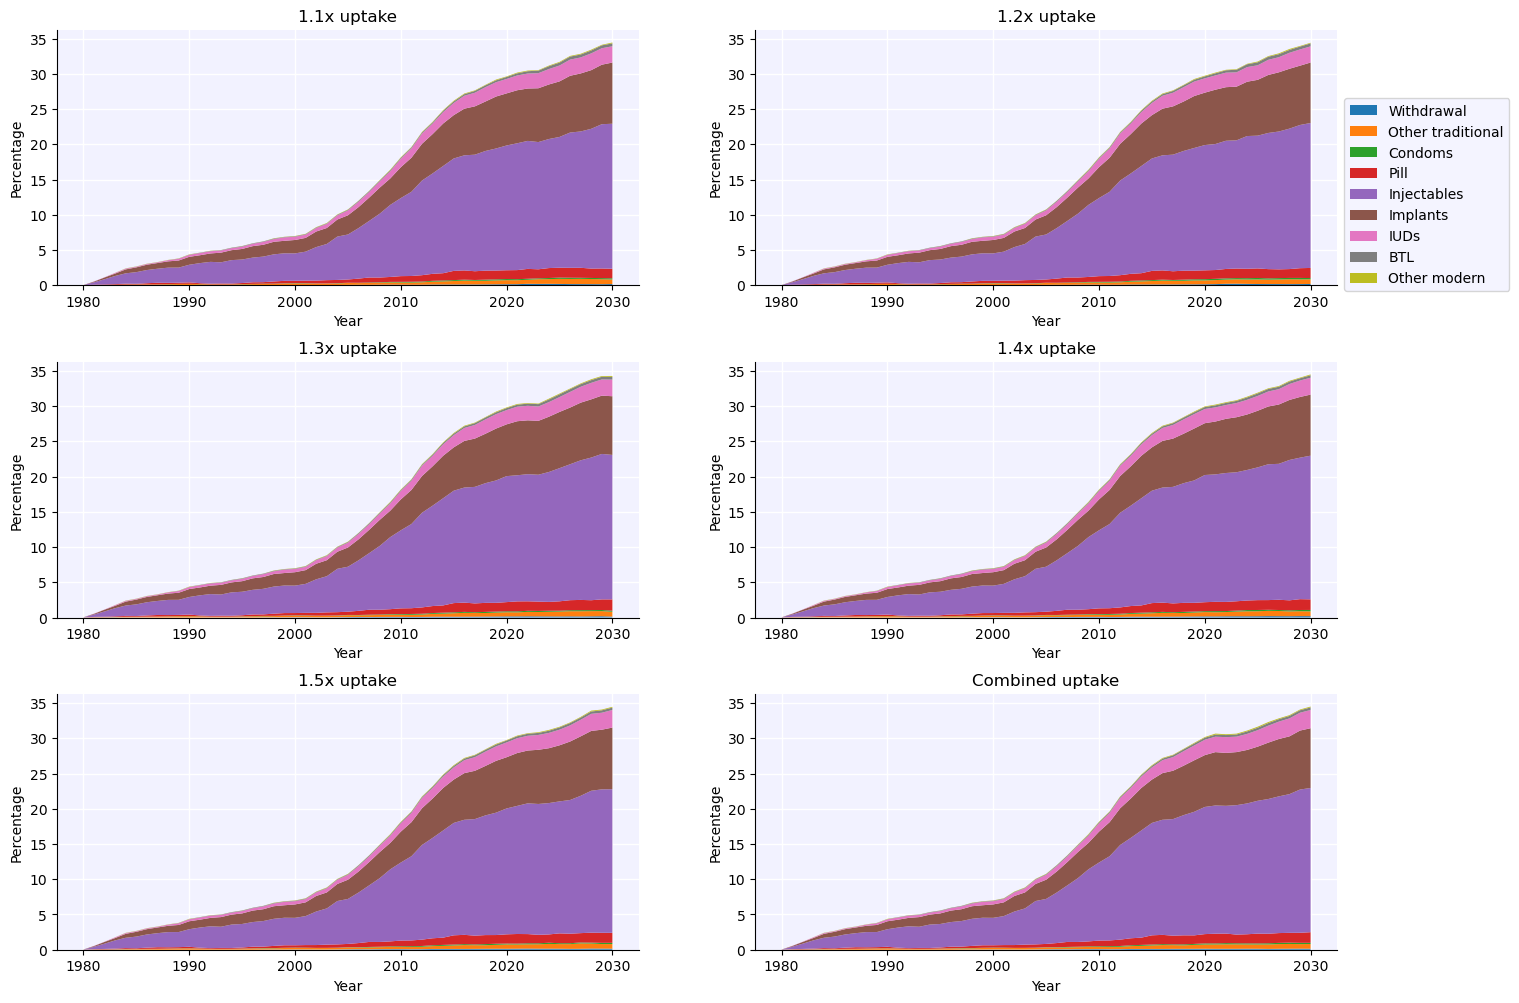

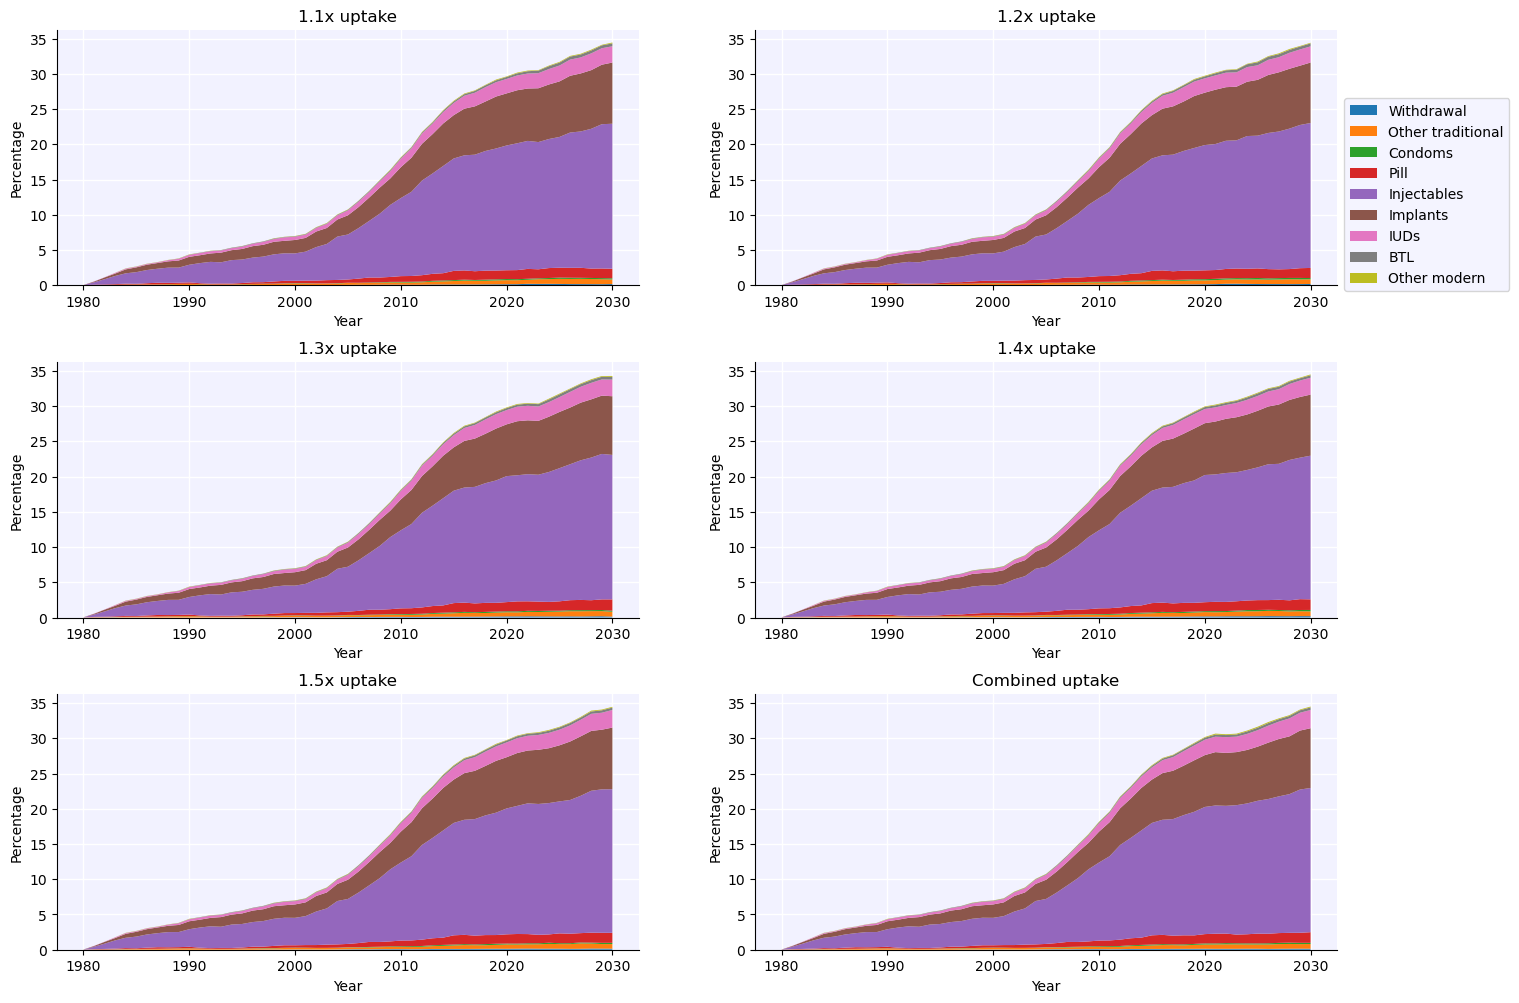

In [109]:
import fpsim as fp

n_agents   = 10_000
start_year = 1980
repeats    = 3
youth_ages = ['<18', '18-20']
    
pars = fp.pars(location='ethiopia', n_agents=n_agents, start_year=start_year, end_year=2030) #set pars to include all shared arguments

method = 'IUDs'

kw = dict(method=method, ages=youth_ages) #set kwargs to take on the method and the age group
d_kw = dict(dest=method, ages=youth_ages)

s1a = fp.make_scen(
        label = '1.1x uptake', 
        year  = 2015,
        probs = [
            dict(init_factor = 1.1, **kw),
                ]
            )
s1b = fp.make_scen(
        label = '1.2x uptake', 
        year  = 2016,
        probs = [
            dict(init_factor = 1.2, **kw),
                ]
            )
s1c = fp.make_scen(
        label = '1.3x uptake', 
        year  = 2017,
        probs = [
            dict(init_factor = 1.3, **kw),
                ]
            )
s1d = fp.make_scen(
        label = '1.4x uptake', 
        year  = 2018,
        probs = [
            dict(init_factor = 1.4, **kw),
                ]
            )
s1e = fp.make_scen(
        label = '1.5x uptake', 
        year  = 2019,
        probs = [
            dict(init_factor = 1.5, **kw),
                ]
            )
s1f = s1a + s1b + s1c + s1d + s1e

scens = fp.Scenarios(pars=pars, repeats=repeats) #add to FPresearch 
scens.add_scen(s1a, label = '1.1x uptake')
scens.add_scen(s1b, label = '1.2x uptake')
scens.add_scen(s1c, label = '1.3x uptake')
scens.add_scen(s1d, label = '1.4x uptake')
scens.add_scen(s1e, label = '1.5x uptake')
scens.add_scen(s1f, label = 'Combined uptake')

scens.run()
scens.plot('method')


  Running "2x uptake": 1980 of 2030 ( 0/601) (0.21 s)  ———————————————————— 0%0%




  Running "Baseline": 1980 of 2030 ( 0/601) (0.26 s)  ———————————————————— 0%

  Running "2x uptake": 1980 of 2030 ( 0/601) (0.22 s)  ———————————————————— 0%
  Running "Baseline": 1981 of 2030 (12/601) (0.59 s)  ———————————————————— 2%
  Running "2x uptake": 1981 of 2030 (12/601) (0.56 s)  ———————————————————— 2%2%


  Running "2x uptake": 1981 of 2030 (12/601) (0.56 s)  ———————————————————— 2%
  Running "1.5x uptake": 1981 of 2030 (12/601) (0.58 s)  ———————————————————— 2%

  Running "1.5x uptake": 1981 of 2030 (12/601) (0.62 s)  ———————————————————— 2%
  Running "Baseline": 1982 of 2030 (24/601) (0.83 s)  ———————————————————— 4%
  Running "1.5x uptake": 1982 of 2030 (24/601) (0.82 s)  ———————————————————— 4%
  Running "Baseline": 1982 of 2030 (24/601) (0.87 s)  ———————————————————— 4%
  Running "2x uptake": 1982 of 2030 (24/601) (0.86 s)  ———————————————————— 4%
  Running "1.5x uptake": 1982 of 2030 

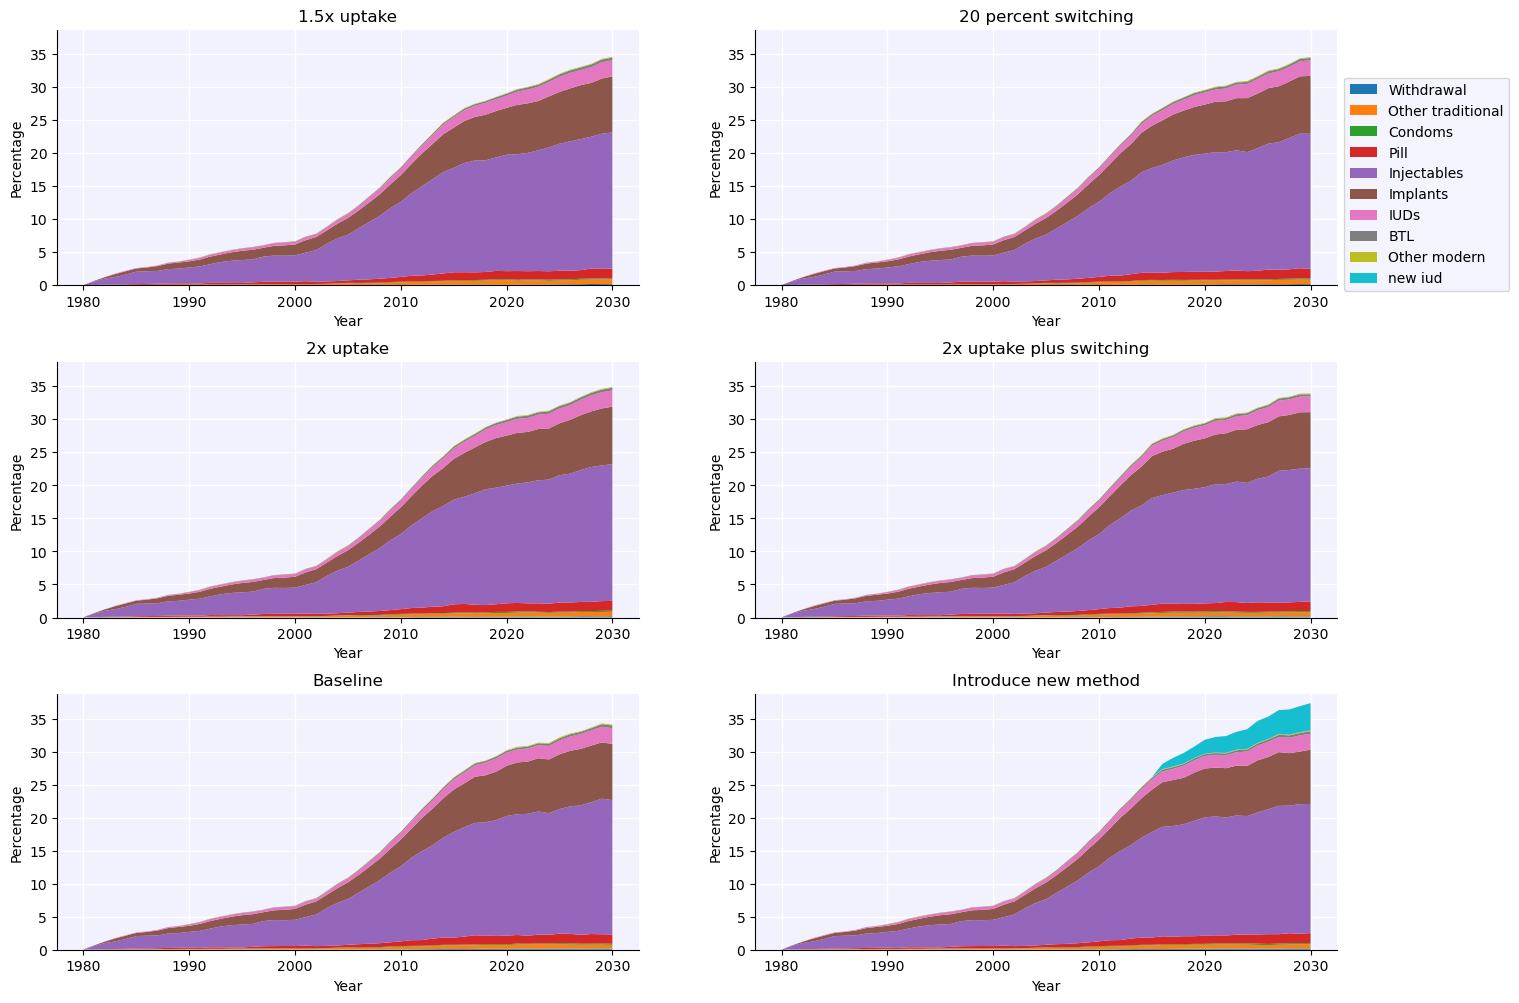

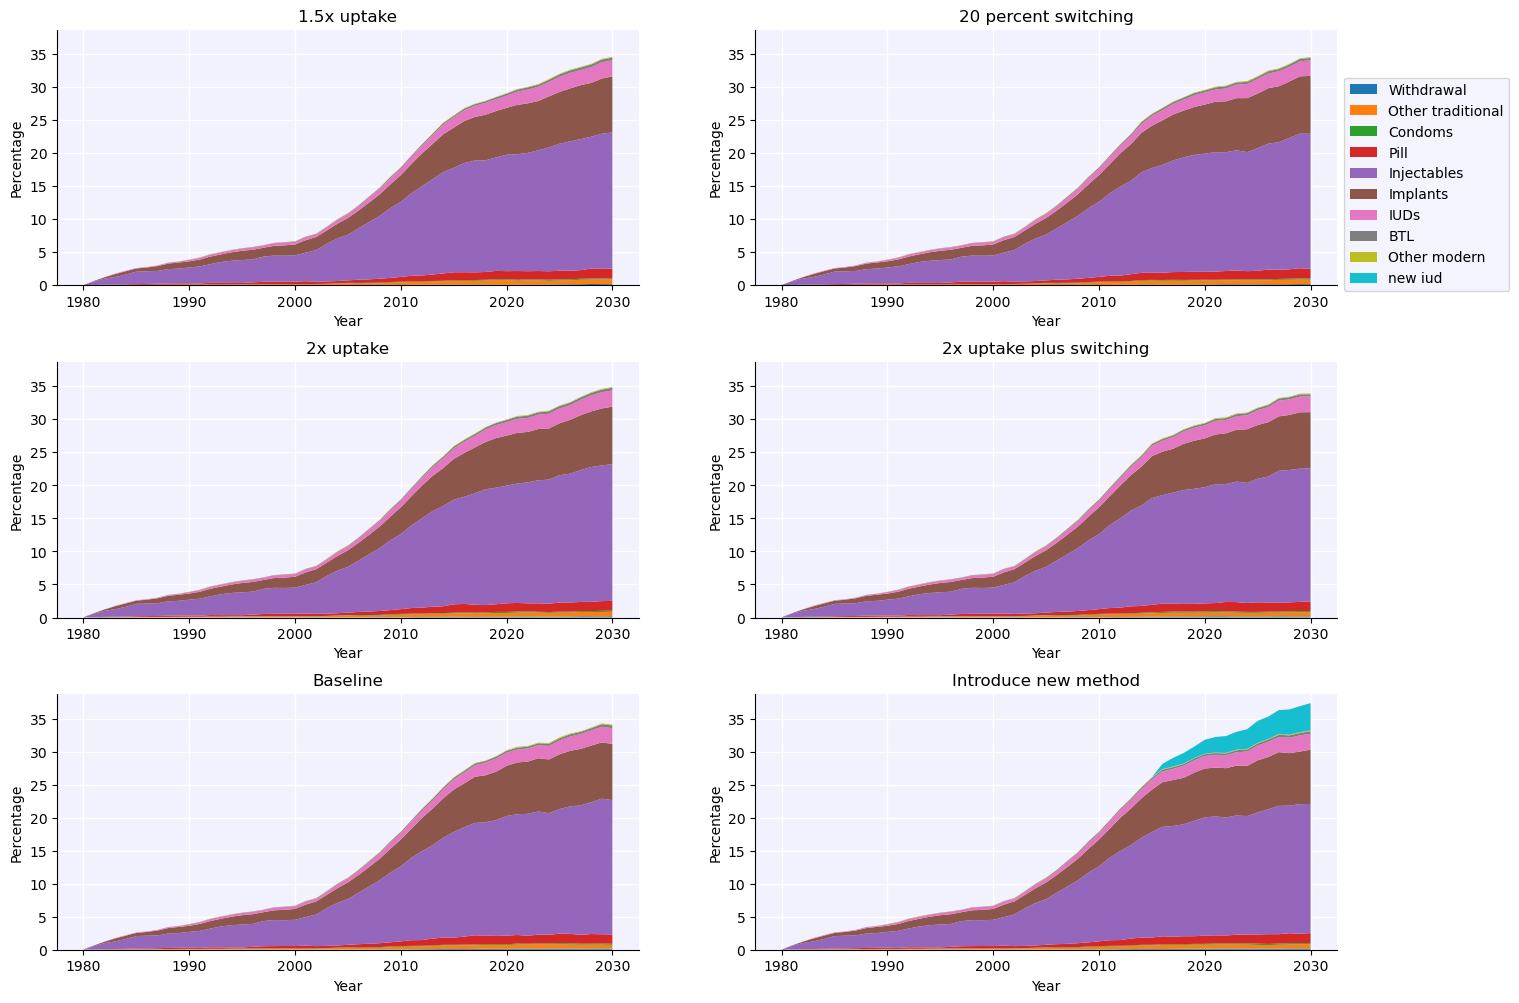

In [113]:
import fpsim as fp

n_agents   = 10_000
start_year = 1980
repeats    = 3
#year       = 2010
youth_ages = ['<18', '18-20']
    
pars = fp.pars(location='amhara', n_agents=n_agents, start_year=start_year, end_year=2030) #set pars to include all shared arguments
pars.add_method(name='new iud', eff=0.99)

method = 'IUDs'
kw = dict(method=method, ages=youth_ages) #set kwargs to take on the method and the age group
d_kw = dict(dest=method, ages=youth_ages)

f1 = fp.make_scen(
        label = '1.5x uptake', 
        year  = year,
        probs = [
            dict(init_factor = 1.5, **kw),
                ]
            )

f2 = fp.make_scen(
        label = '2x uptake',
        year  = year,
        probs = [
            dict(init_factor = 2.0, **kw),
                ]
            )

f_switch = fp.make_scen(
        label = '20 percent switching',
        year  = year,
        probs = [
            dict(source = 'IUDs', value = 0.20, **d_kw)
                ]
           )
f3 = f2 + f_switch 

method = 'new iud'
kw = dict(method=method, ages=youth_ages) #set kwargs to take on the method and the age group

f_new = fp.make_scen(
        label = 'introduce new method',
        year  = 2015, #replacing the intervention year, giving the new method a bit of a lag
        probs = [
            dict(copy_from='IUDs', **kw),
            dict(init_value=0.05, **kw),
                ]
            )

scens = fp.Scenarios(pars=pars, repeats=repeats) #add to FPresearch 
scens.add_scen(label='Baseline')
scens.add_scen(f1, label = )
scens.add_scen(f2)
scens.add_scen(f_switch)
scens.add_scen(f3, label = '2x uptake plus switching') #combining f2 and f_switch and re-labeling here)
scens.add_scen(f_new)

scens.run()
scens.plot('method')


To further customize your own plots, you can always download the dataframe and selected output to a .csv file, and export to your preferred environment. We've used this method for a wide range of quick analyses, from creating pivot tables in excel to custom plots using ggplot2 in R. 

In [48]:
df = scens.msim.to_df()
df.to_csv(r'T4_scenario_output.csv')

This concludes the FPsim tutorials. We look forward to seeing what you create using this tool!